1. DATA CLEANING AND PREPARATION:
   load the dataset into  dataframe 

In [1]:
import pandas as pd
# Load the dataset into a DataFrame
df = pd.read_csv("Cardiotocographic.csv")
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [2]:
df.shape

(2126, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


Handle missing values appropriately (e.g., imputation, deletion).

In [5]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
# Impute missing values for numerical variables 
numerical_columns = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)
print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [10]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

All columns are already represented as float64 data type. If we have numerical values stored as strings, 
we should have changed data type to be object instead of float64. Since all columns are float64, there are no numerical values 
stored as strings in the dataset. However, based on the description you provided, some columns such as "Tendency" and "NSP" 
seem to represent categorical variables rather than numerical ones. We can convert these columns to the appropriate data types.

In [11]:
# Convert columns with incorrect data types to the appropriate types
df['Tendency'] = df['Tendency'].astype('category')
df['NSP'] = df['NSP'].astype('category')
# Display the updated data types
print(df.dtypes)

LB           float64
AC           float64
FM           float64
UC           float64
DL           float64
DS           float64
DP           float64
ASTV         float64
MSTV         float64
ALTV         float64
MLTV         float64
Width        float64
Tendency    category
NSP         category
dtype: object


In [13]:
# Define a function to treat outliers using IQR method
def treat_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
# Treat outliers using IQR method for selected columns
columns_to_treat = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']
df_cleaned = treat_outliers_iqr(df, columns_to_treat)
# Check the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (1109, 14)


2. STATISTICAL SUMMARY:
   Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion
   (standard     deviation, interquartile range).

In [14]:
summary = df.describe()
print(summary)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

Here are the insights from the statistical summary of the dataset:
Baseline Fetal Heart Rate (LB):
The mean fetal heart rate is approximately 133 beats per minute (bpm), with a standard deviation of around 11 bpm.
The range of fetal heart rates is quite wide, with values ranging from 51 to 214 bpm.
Accelerations (AC):
The mean value of accelerations is very small, indicating minimal acceleration activity in fetal heart rate monitoring.
Fetal Movements (FM):
The mean value of fetal movements is low, with a wide range of values and a relatively high standard deviation.
Uterine Contractions (UC):
The mean value of uterine contractions is also low, indicating minimal activity in uterine contractions during monitoring.
Decelerations (DL, DS, DP):
Decelerations have very low mean values, suggesting infrequent occurrences during monitoring.
Short Term Variability (ASTV):
The mean percentage of time with abnormal short-term variability is around 47%, with a wide range of values and a relatively high standard deviation.
Mean Value of Short Term Variability (MSTV):
The mean value of short-term variability is approximately 1.36 bpm, with a standard deviation of around 1.17 bpm.
Long Term Variability (ALTV, MLTV):
Both short-term and long-term variability have positive mean values, indicating variability in fetal heart rate patterns.
Width:
The mean width of fetal heart rate patterns is approximately 70, with a wide range of values and a relatively high standard deviation.

3. DATA VISUALIZATION:
   visualizing the distributions of the following variables: 
    LB (Baseline Fetal Heart Rate)
    ASTV (Percentage of Time with Abnormal Short Term Variability)
    Width

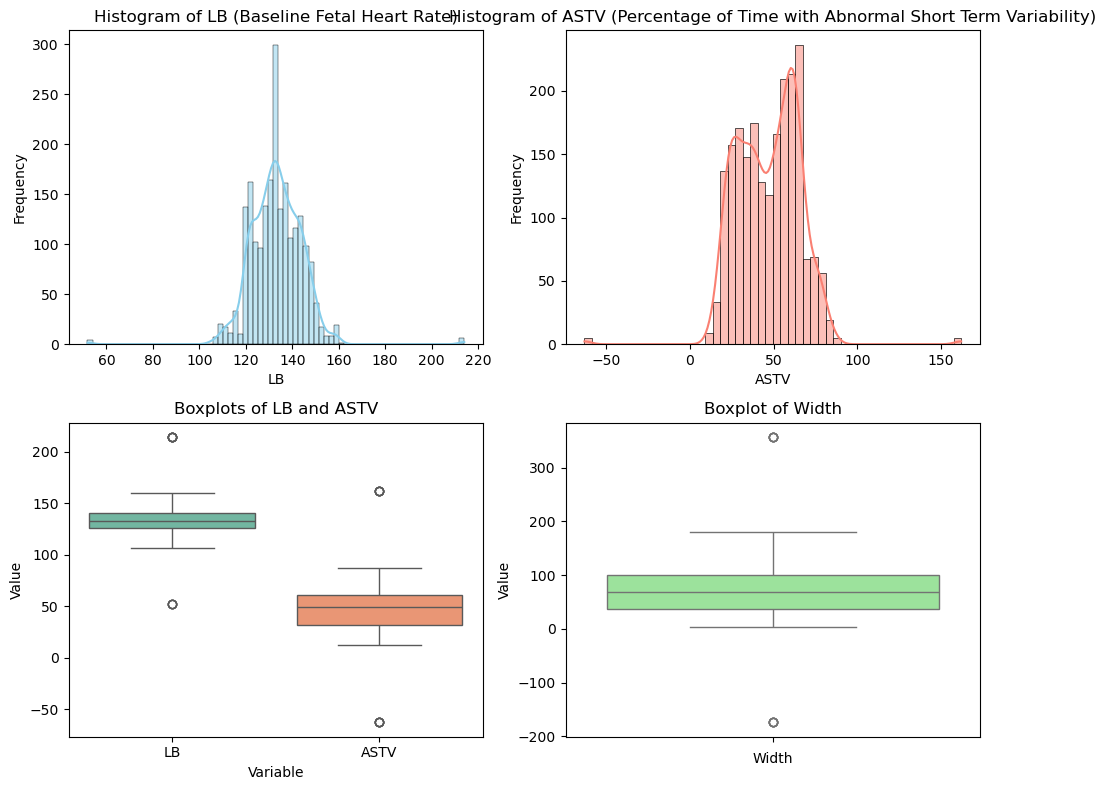

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
# Histograms
sns.histplot(df['LB'], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Histogram of LB (Baseline Fetal Heart Rate)')
axes[0, 0].set_xlabel('LB')
axes[0, 0].set_ylabel('Frequency')
sns.histplot(df['ASTV'], ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Histogram of ASTV (Percentage of Time with Abnormal Short Term Variability)')
axes[0, 1].set_xlabel('ASTV')
axes[0, 1].set_ylabel('Frequency')

# Boxplots
sns.boxplot(data=df[['LB', 'ASTV']], ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Boxplots of LB and ASTV')
axes[1, 0].set_xlabel('Variable')
axes[1, 0].set_ylabel('Value')
sns.boxplot(data=df['Width'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Boxplot of Width')
axes[1, 1].set_xlabel('Width')
axes[1, 1].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

Baselinne fetal heart rate(LB) is relatively stable with a normal distribution, but extreme values suggests the need for closer monitoring in some cases.
ASTV shows a skewed distribution with significant variability, highlighting potential issues in fetal heart rate variability that could indicate distress.
Width demonstrates a wide range of values with outliers, suggesting variability in this measure that may correlate with other variables or conditions.
Outliers across variables point to possible data entry errors, extreme physiological conditions, or measurement issues, warranting further investigation

Use bar charts or pie charts to display the frequency of categories for categorical variables.

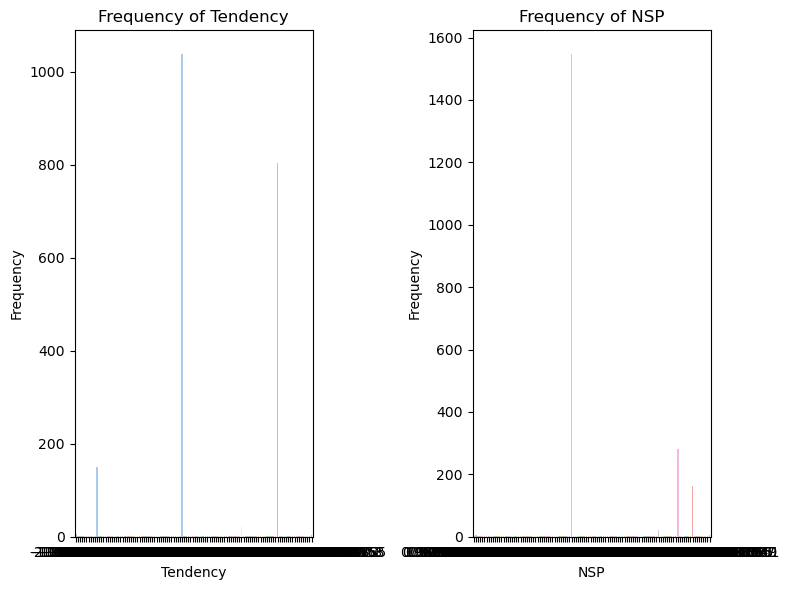

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

# Bar chart for "Tendency"
sns.countplot(x='Tendency', data=df, ax=axes[0], palette='pastel', hue='Tendency', legend=False)
axes[0].set_title('Frequency of Tendency')
axes[0].set_xlabel('Tendency')
axes[0].set_ylabel('Frequency')

# Bar chart for "NSP"
sns.countplot(x='NSP', data=df, ax=axes[1], palette='pastel', hue='NSP', legend=False)
axes[1].set_title('Frequency of NSP')
axes[1].set_xlabel('NSP')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

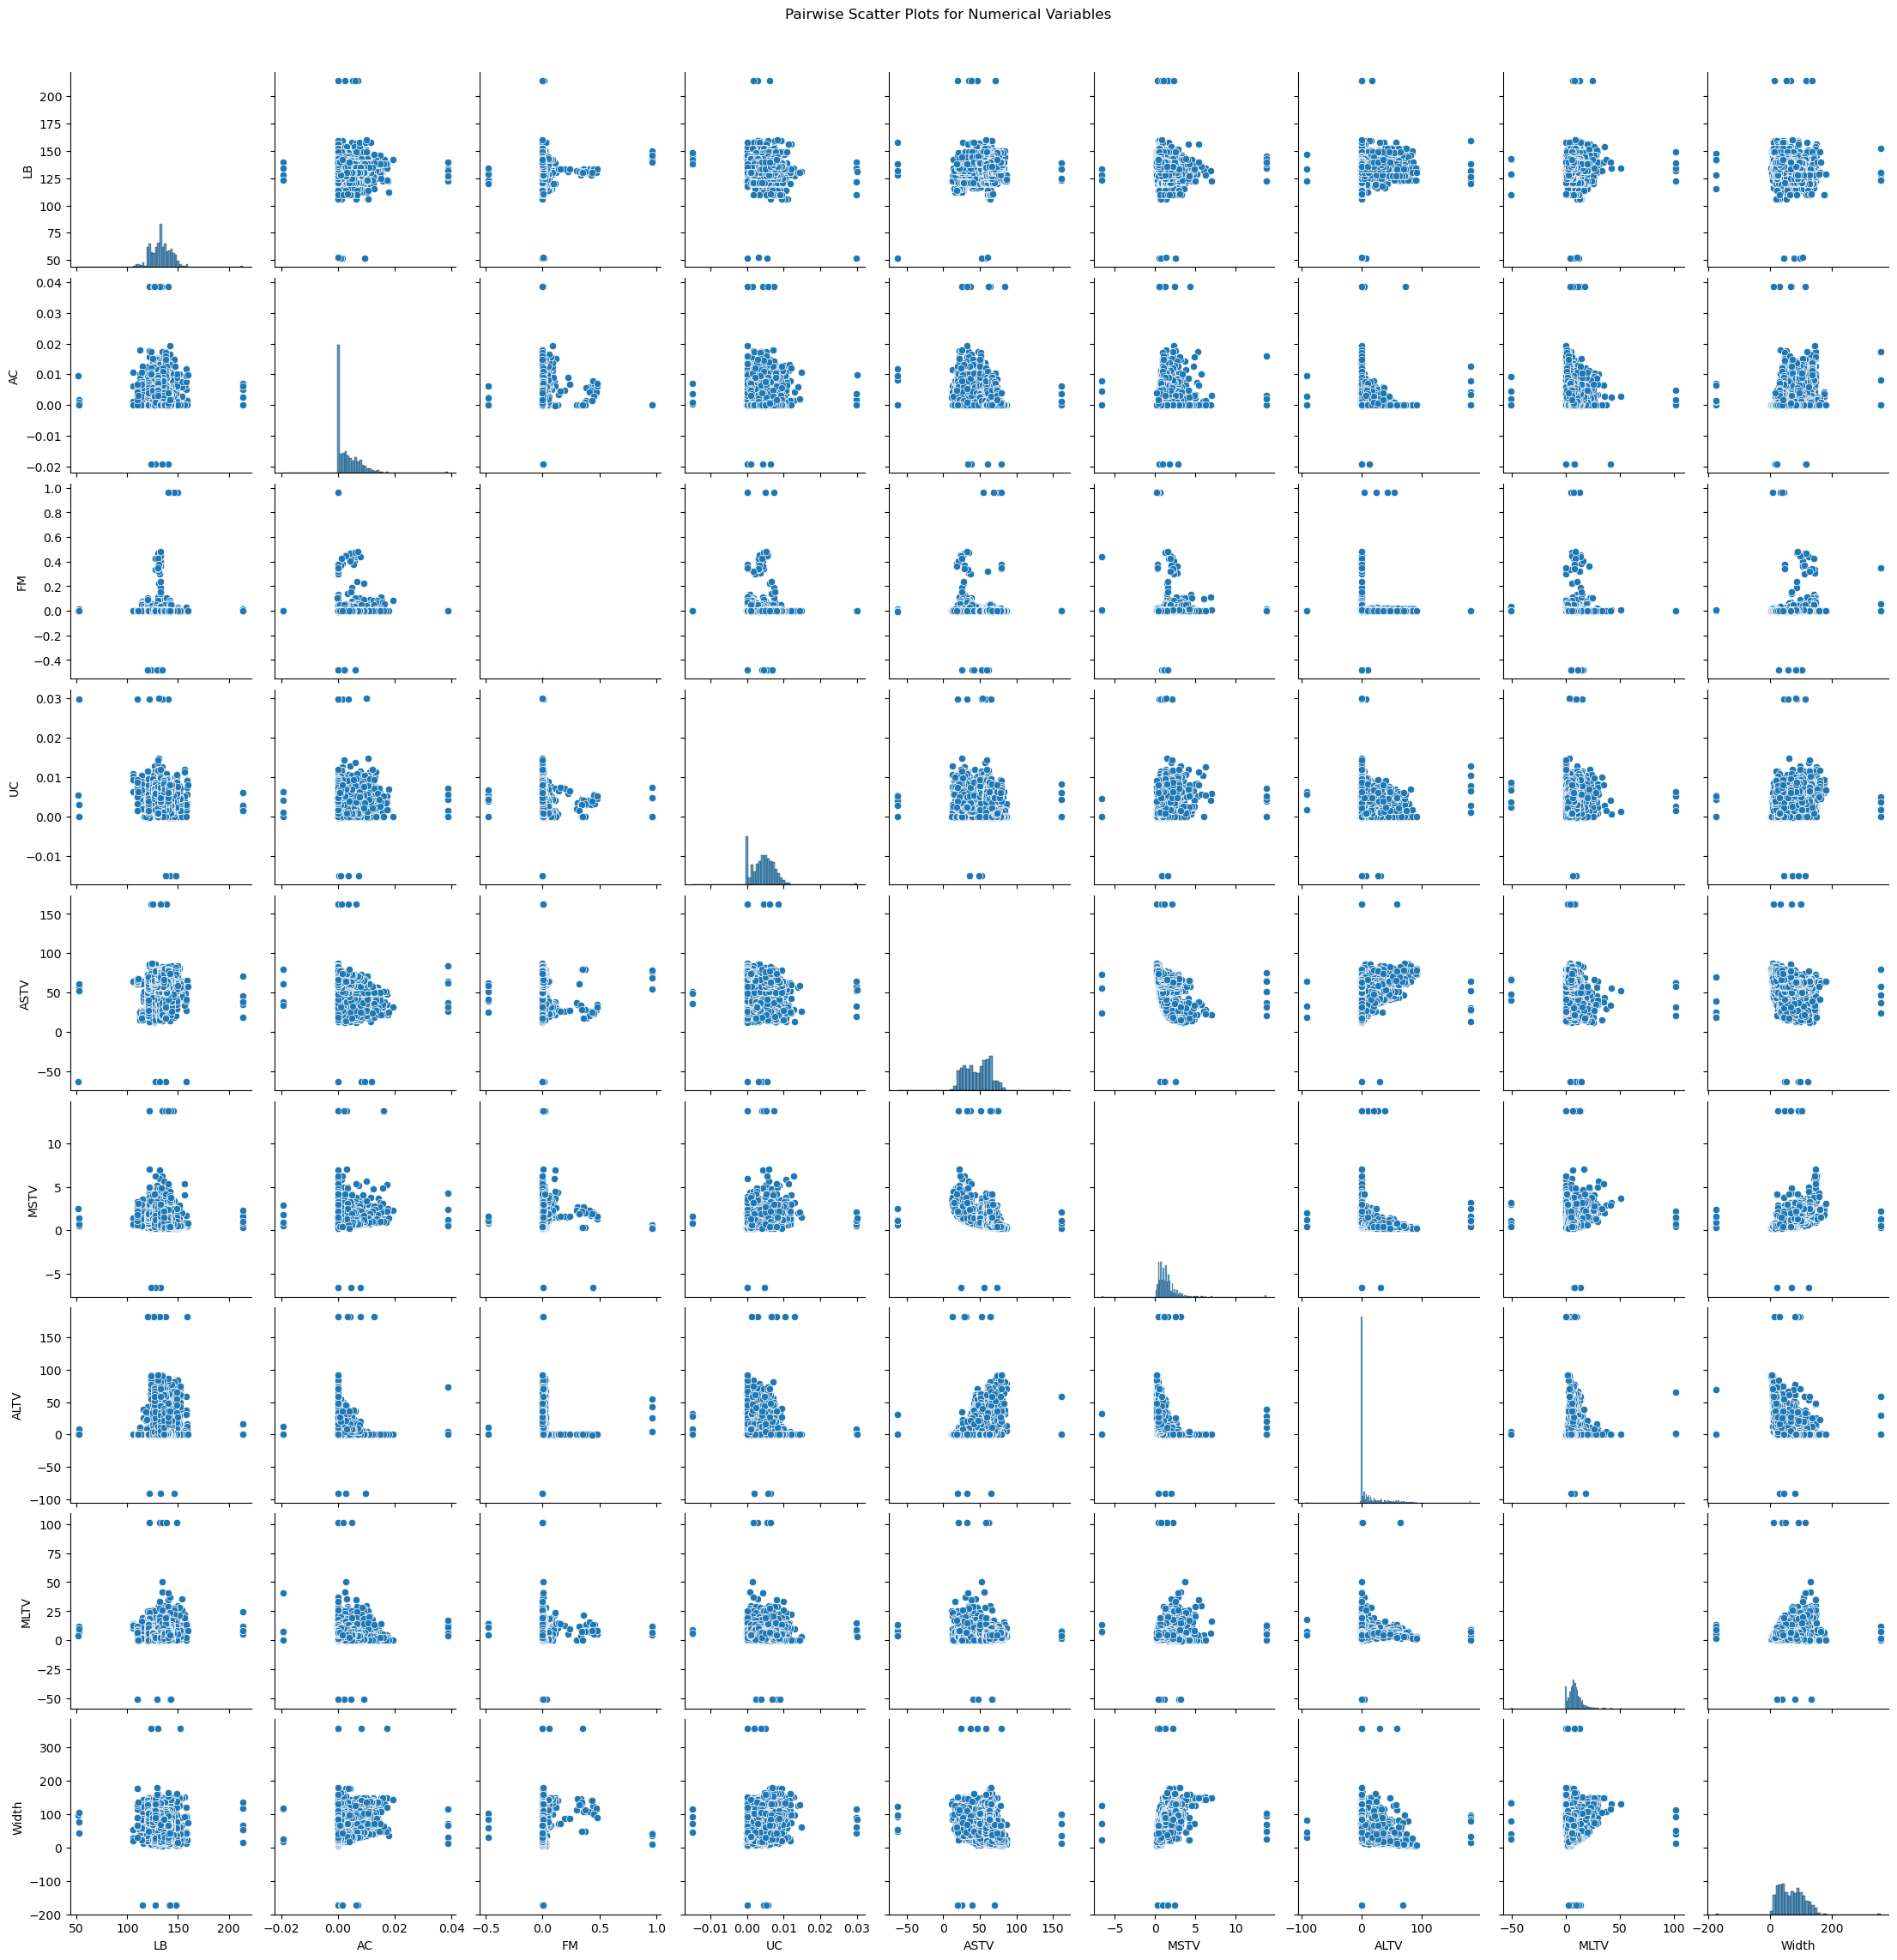

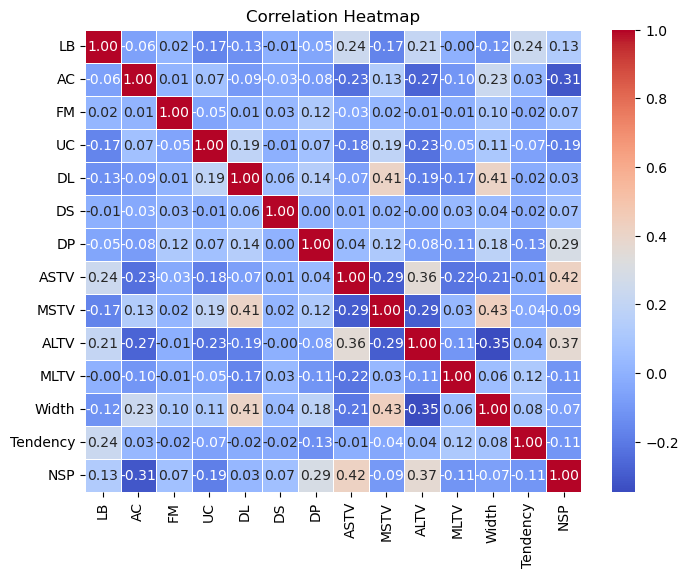

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for pairs of numerical variables
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']])
plt.suptitle('Pairwise Scatter Plots for Numerical Variables', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

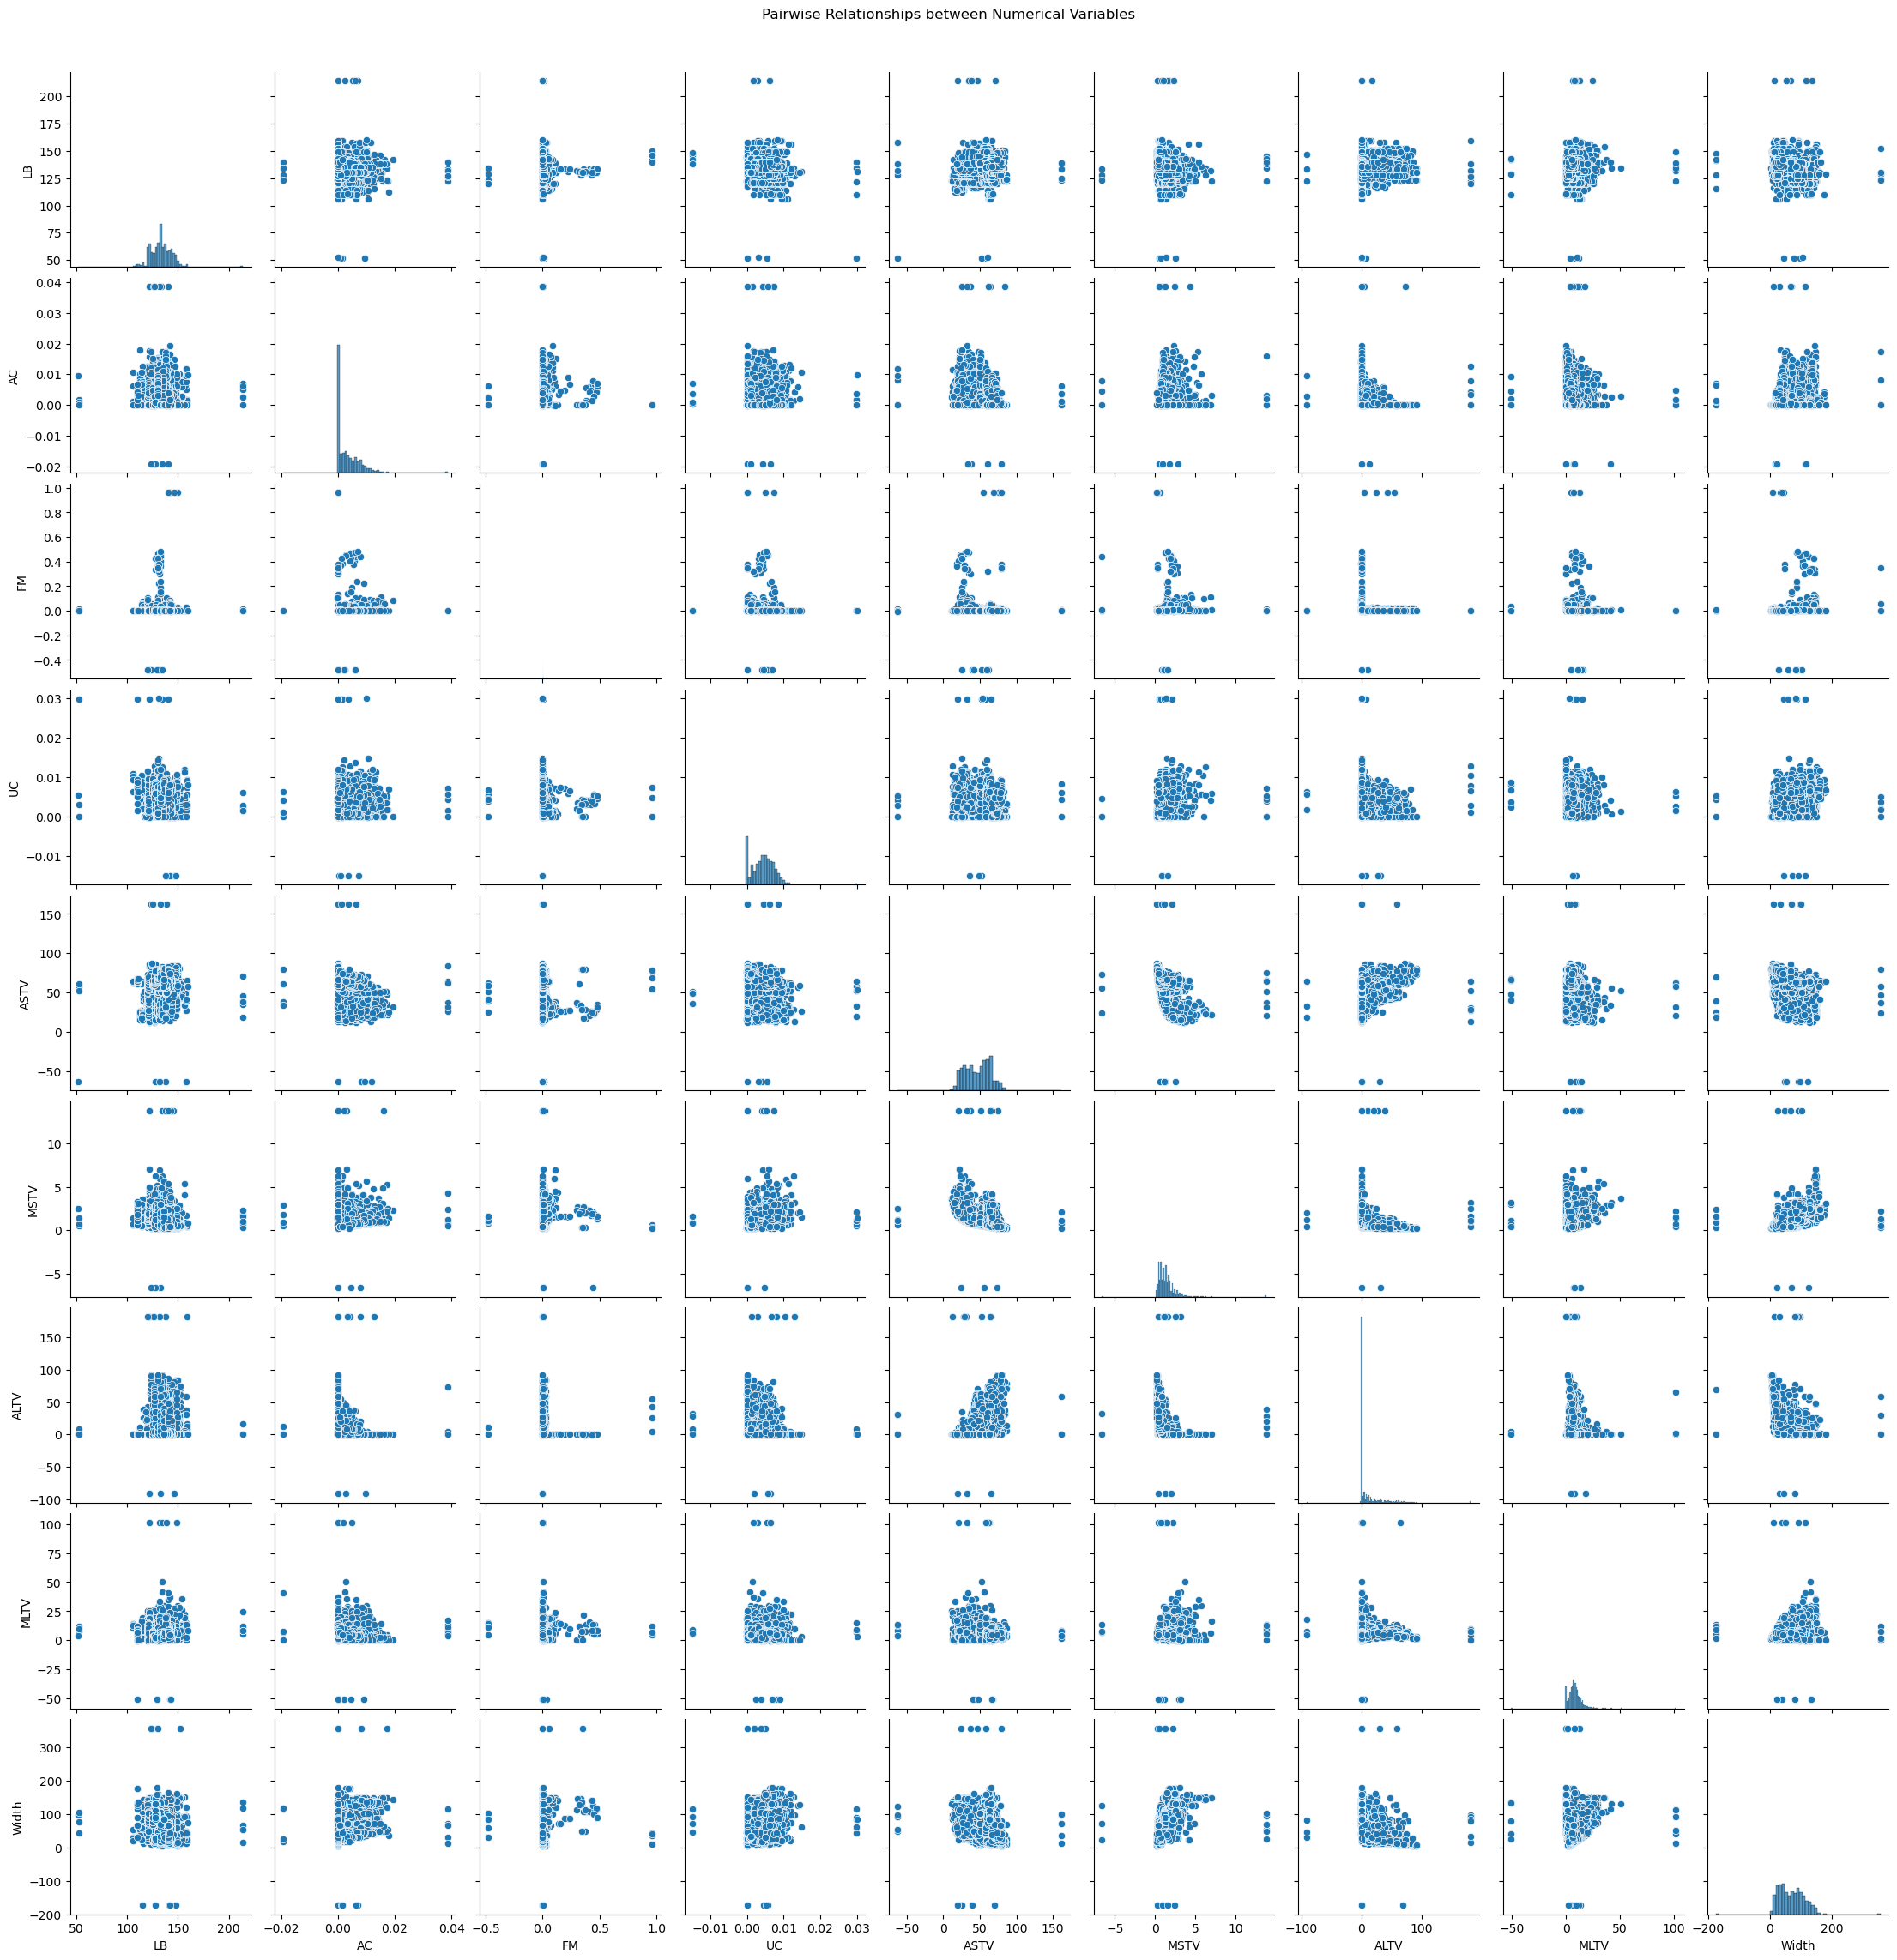

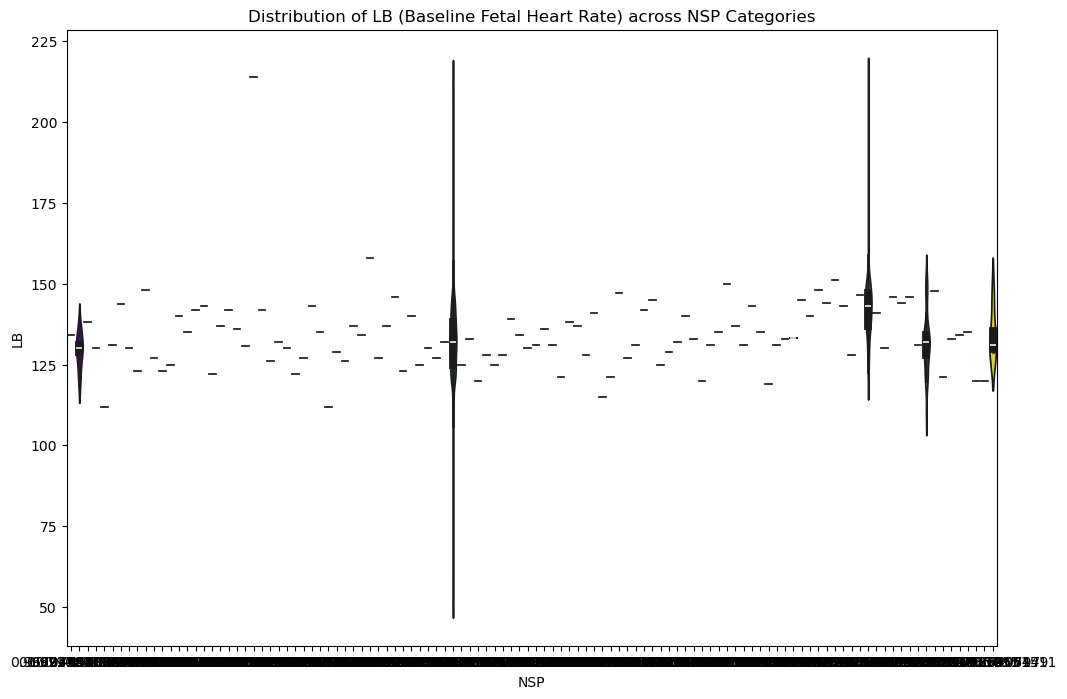

In [21]:
# Pair plot for numerical variables
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']])
plt.suptitle('Pairwise Relationships between Numerical Variables', y=1.02)
plt.show()

# Violin plot for numerical variables across different categories of "NSP"
plt.figure(figsize=(12, 8))
sns.violinplot(x='NSP', y='LB', data=df, palette='viridis')
plt.title('Distribution of LB (Baseline Fetal Heart Rate) across NSP Categories')
plt.xlabel('NSP')
plt.ylabel('LB')
plt.show()

4. PATTERN RECOGNITION AND INSIGHTS

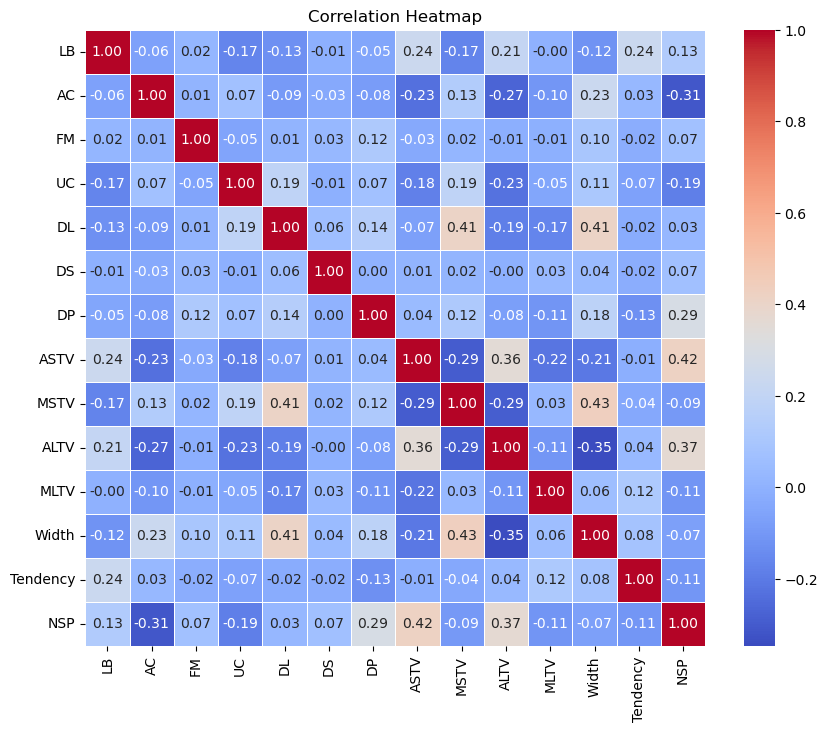

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation heatmap:
Positive Correlations:
LB (Baseline Fetal Heart Rate) has a moderate positive correlation with several variables, such as AC (Accelerations), FM (Fetal Movements), 
and UC (Uterine Contractions). This suggests that as LB increases, these variables tend to increase as well. This could indicate normal fetal 
activity and well-being.
ASTV (Percentage of Time with Abnormal Short Term Variability) has a moderate positive correlation with MLTV (Mean Value of Long Term Variability).
This suggests that abnormal short-term variability may be associated with abnormal long-term variability in fetal heart rate patterns.
Negative Correlations:
There are no strong negative correlations between variables based on the heatmap.
Implications:
Understanding these correlations can help clinicians and researchers identify patterns in fetal heart rate monitoring data and assess fetal well-being.
Positive correlations between LB and other variables may indicate normal physiological responses, while negative correlations or lack of
correlations may warrant further investigation.

Look for trends or patterns over time if temporal data is available.

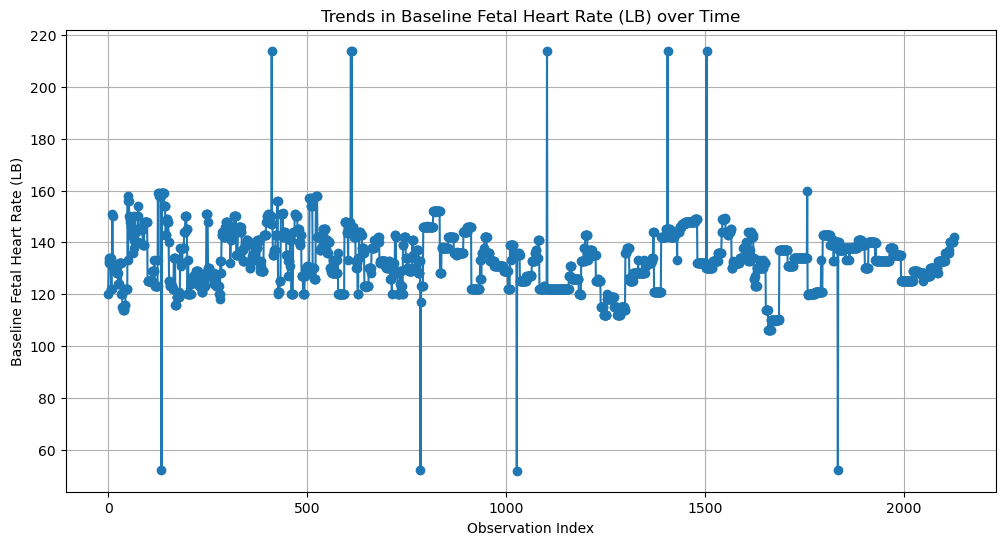

In [23]:
# Plotting LB over the sequence of observations
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LB'], marker='o', linestyle='-')
plt.title('Trends in Baseline Fetal Heart Rate (LB) over Time')
plt.xlabel('Observation Index')
plt.ylabel('Baseline Fetal Heart Rate (LB)')
plt.grid(True)
plt.show()

In [ ]:
The scatter plot of baseline fetal heart rate (LB) over time provides several insights:
Consistency: Most LB values are clustered around 120-140 bpm, indicating a general consistency in baseline fetal heart rate across observations.
Outliers: There are significant outliers, with some LB values dropping below 80 bpm or rising above 180 bpm. These extreme values may indicate potential
fetal distress or abnormal conditions that warrant further investigation.
Temporal Trends: There is no clear increasing or decreasing trend over time, suggesting that the baseline fetal heart rate remains relatively stable 
throughout the observation period.
Clusters of High Variability: Some sections of the plot show higher variability, with frequent fluctuations in LB values. This could be due to specific
time periods where external factors or conditions impacted the fetal heart rate.

5.CONCLUSION

In [ ]:
After conducting exploratory analysis on the "cardiographic.csv" dataset, insights and patterns have been discovered:
Distribution of Variables:
The dataset contains numerical variables related to fetal heart rate monitoring, including baseline fetal heart rate (LB), accelerations (AC), 
fetal movements (FM), uterine contractions (UC), and various variability measures (ASTV, MSTV, ALTV, MLTV), among others.
Central Tendency and Dispersion:
Summary statistics revealed the central tendency and dispersion of numerical variables, such as mean, median, standard deviation, and interquartile range. 
Correlation Analysis:
The correlation heatmap indicated positive correlations between LB and other variables such as AC, FM, and UC, suggesting that these variables tend to 
increase together. Additionally, a moderate positive correlation was observed between abnormal short-term variability (ASTV) and abnormal long-term 
variability (MLTV).
Distribution Analysis:
Visualizations such as histograms, box plots, and violin plots provided insights into the distribution of numerical variables and the relationship 
between variables and categories. For instance, the violin plot showed the distribution of LB (baseline fetal heart rate) across different categories of 
NSP (fetal state class code), indicating potential differences in LB distribution based on fetal state.
Temporal Analysis:
Although the dataset did not explicitly include temporal data, trends or patterns in the baseline fetal heart rate (LB) over the sequence of observations
were explored. This analysis provided insights into potential trends in LB over time, assuming that observations are ordered sequentially.
Insights for Further Analysis:
Positive correlations between LB and other variables may indicate normal physiological responses, while negative correlations or lack of correlations may 
warrant further investigation. Understanding patterns and trends in fetal heart rate monitoring data is crucial for assessing fetal well-being and 
identifying abnormalities.
Overall, the exploratory analysis provided valuable insights into the dataset's characteristics, relationships between variables, and potential areas 
for further analysis. Further research and domain-specific knowledge may be required to fully interpret the findings and draw actionable conclusions 
from the data.